## Using the merged_df from HW 6

# 1. Data Loading and Preparation

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [23]:
#Reads in the merged data we created in Homework 6
merged_df = pd.read_csv('merged_full_nvd_kev_2024.csv', parse_dates=['published_date'])

In [39]:
#Converts the types of the columns for better processing
merged_df['cvss3_base_score'] = pd.to_numeric(merged_df['cvss3_base_score'])
merged_df['published_date'] = pd.to_datetime(merged_df['published_date'])

# Drop rows missing any of the fields needed for visualization 
merged_df_clean = merged_df.dropna(subset=['cvss3_base_score', 'published_date', 'is_exploited'])

# 2. Visualization 1: Distribution of Vulnerability Severity

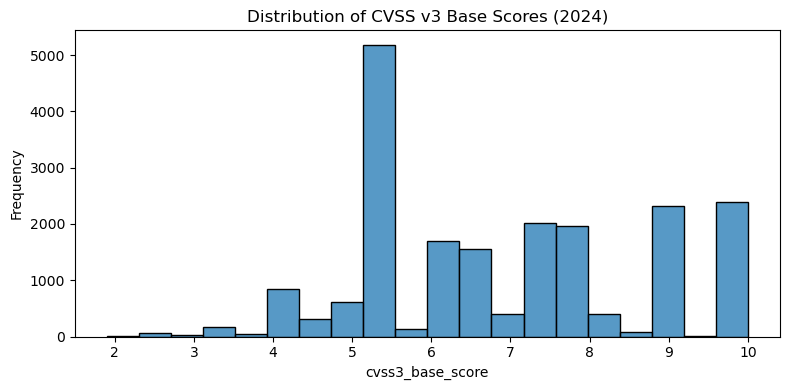

In [54]:
plt.figure(figsize=(8,4))
plt.subplot(1,1,1)                  
sns.histplot(merged_df_clean['cvss3_base_score'], bins=20)
plt.title('Distribution of CVSS v3 Base Scores (2024)')
plt.xlabel('cvss3_base_score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Interpretation
The histogram of CVSS3_base_score shows that most vulnerabilities fall into the moderate severity range of 4.0 - 6.9. There are many fewer low-severity scores, of 3.9 or lower. While the high-severity issues are less common than the medium-severity scores, the data still reflects that they are heavily prevalent. With the frequency of the high and critical scores being higher than low severity vulnerabilities, the histogram shows a right-skewed dataset. With the data being right-skewed, it shows that when a vulnerability is added to the databases, it is likely to be of a medium to high severity and needs attention quickly.

# 3. Visualization 2: Vulnerabilities Over Time

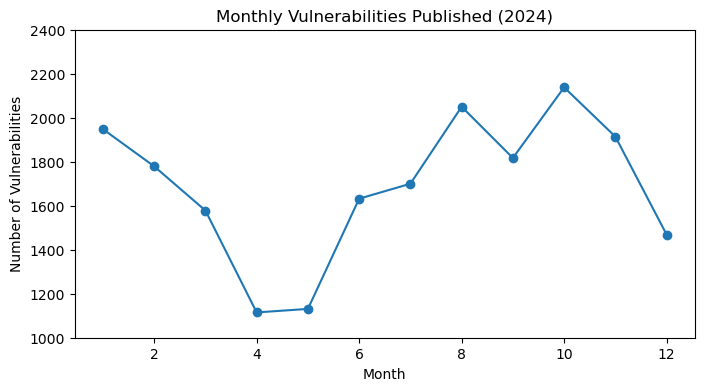

In [90]:
# Gets the month number as an integer between 1-12
merged_df_clean.loc[:,'month_num'] = merged_df_clean['published_date'].dt.month

# Groups the data from each month and counts the number of vulnerabilities in the month
vulnerability_count = merged_df_clean.groupby('month_num').size()

plt.figure(figsize=(8,4))
plt.plot(vulnerability_count.index, vulnerability_count.values, marker='o')
plt.title('Monthly Vulnerabilities Published (2024)')
plt.xlabel('Month')
plt.ylabel('Number of Vulnerabilities')
plt.ylim(1000, 2400)
plt.show()

## Observations:
The graph shows that publishing per month is not evenly distributed, as there are clear peaks and lows in the numbers. October is the peak of the reporting, as it reaches around 2100 vulnerabilities published for the month. While October is the peak, the late spring months of April and May show that publishing bottomed out for the two months, only reaching around 1100 vulnerabilities for the month.

# 4. Visualization 3: Severity of Exploited vs. Non-Exploited Vulnerabilities

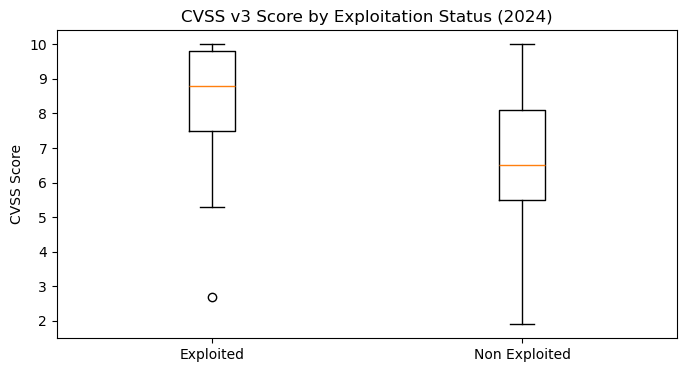

In [134]:
# Separates the values for the vulnerabilities that were exploited and not exploited.
# After finding the boolean values, it then gets the CVSS score for the data points.
exploited = merged_df_clean[merged_df_clean['is_exploited'] == True]['cvss3_base_score']
non_exploited = merged_df_clean[merged_df_clean['is_exploited'] == False]['cvss3_base_score']

# Creates a side-by-side box plot, showing the exploited and non-exploited data
plt.figure(figsize=(8,4))
plt.boxplot([exploited, non_exploited], tick_labels=['Exploited', 'Non Exploited'])
plt.title('CVSS v3 Score by Exploitation Status (2024)')
plt.ylabel('CVSS Score')
plt.show()

# Differences
The differences between the exploited and non-exploited vulnerabilities show that when the vulnerability is exploited, it usually has a more severe CVSS score. The median for both boxes also displays the differences in severity as the median for the exploited is around 8.5, while for the non-exploited it is closer to 6. Overall with comparing the box plots shows that the higher the severity, the more likely it is to be taken advantage of, while the lower scores either are much harder to exploit or there isn't much reason to exploit them.